# E-Commerce Data Analysis

## Table of Contents

<br/>

[1) Data Preparation](#1)<br/><br/>
[2) Exploratory Data Analysis (EDA)](#2)<br/><br/>
[2.1) How many orders for each country?](#2.1)<br/><br/>
[2.2) How much money did each country spent?](#2.2)<br/><br/>
[2.3) How were sales over the months?](#2.3)
- [Average Ticket](#A.T)<br/>

[2.4) How orders were distributed by day (of month)](#2.4)<br/><br/>
[2.5) How orders were distributed by day (of week):](#2.5)<br/><br/>
[2.6) How orders were distributed by hour?](#2.6)<br/><br/>
[2.7) What are the most common stock codes?](#2.7)<br/><br/>
[2.8) Which stock codes contribute the most to revenue?](#2.8)

<br/><br/>

## <a id='1'>1) Data Preparation</a>

<br/>
Loading all the modules that will be used:
<br/>
<br/>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

from pandas_profiling import ProfileReport

<br/>
<br/>
<br/>
Then reading the data set and taking the first look:
<br/>
<br/>

In [3]:
df = pd.read_csv('../1985_3404_bundle_archive/data.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


<br/>
<br/>
<br/>
Let's standardize the dataframe's columns and text, facilitating the handling.
<br/>
<br/>

In [5]:
# New column names

new_cols = ['invoice_num', 'stock_code', 'description', 'quantity',
            'invoice_date', 'unit_price', 'customer_id', 'country']
df.columns = new_cols

df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# New columns to represent description and country in lower case

# Lowercase description
df.loc[~df['description'].isna(), 'lowercase_description'] = df.loc[
                                                                    ~df['description'].isna(), 'description'
                                                                   ].apply(lambda text: text.lower())

# Lowercase country
df.loc[~df['country'].isna(), 'lowercase_country'] = df.loc[
                                                            ~df['country'].isna(), 'country'
                                                           ].apply(lambda text: text.lower())

In [7]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hanging heart t-light holder,united kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,united kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,united kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,united kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart.,united kingdom


<br/>
<br/>
<br/>
Creating a report to get an overview of the data:
<br/>
<br/>

In [8]:
# This doesn't appear on github, but the design is great
# It is used only as an overview
# Everything we need from this will be explored later
profile = ProfileReport(df, title='Profiling E-Commerce',html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Render HTML: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.25s/it]


<br/>
<br/>
<br/>
Let's focus on data types.
<br/>
<br/>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   invoice_num            541909 non-null  object 
 1   stock_code             541909 non-null  object 
 2   description            540455 non-null  object 
 3   quantity               541909 non-null  int64  
 4   invoice_date           541909 non-null  object 
 5   unit_price             541909 non-null  float64
 6   customer_id            406829 non-null  float64
 7   country                541909 non-null  object 
 8   lowercase_description  540455 non-null  object 
 9   lowercase_country      541909 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 41.3+ MB


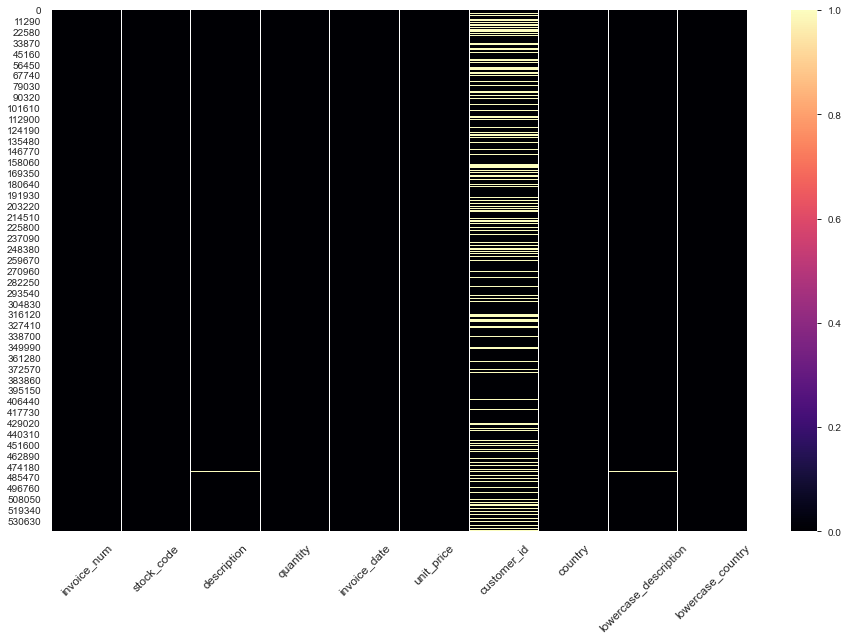

In [10]:
# Distribuition of missing values
plt.figure(figsize=(13,9))

sns.heatmap(df.isna(), cmap='magma')

plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()

<br/>
<br/>
<br/>
There is no problem in keeping fields that we won't do calculations as "object", such as: invoice_num and stock_code. There are missing values in customer_id, but I will keep it this way for now. I will convert customer_id to string ("object").
<br/>
<br/>

In [11]:
# We don't need ".0" in the end of the customer_id values
df.loc[~df['customer_id'].isna(), 'customer_id'] = df.loc[
                                                          ~df['customer_id'].isna(), 'customer_id'
                                                         ].apply(lambda ID: str(ID)[:-2])

In [12]:
df['customer_id'].value_counts()

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
16144       1
13120       1
18184       1
16881       1
14424       1
Name: customer_id, Length: 4372, dtype: int64

In [13]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,white hanging heart t-light holder,united kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,white metal lantern,united kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,cream cupid hearts coat hanger,united kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,knitted union flag hot water bottle,united kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,red woolly hottie white heart.,united kingdom


<br/>
<br/>
<br/>
The next step is to transform invoice_date to "datetime".
<br/>
<br/>

In [14]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   invoice_num            541909 non-null  object        
 1   stock_code             541909 non-null  object        
 2   description            540455 non-null  object        
 3   quantity               541909 non-null  int64         
 4   invoice_date           541909 non-null  datetime64[ns]
 5   unit_price             541909 non-null  float64       
 6   customer_id            406829 non-null  object        
 7   country                541909 non-null  object        
 8   lowercase_description  540455 non-null  object        
 9   lowercase_country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 41.3+ MB


<br/>
<br/>
<br/>
I will split the InvoiceDate column into: Year, Month, WeekDay, Hour and YearMonth. This way, we can group our data however we want based on any time analysis.
<br/>
<br/>

In [16]:
df['year'] = df['invoice_date'].apply(lambda time: time.year)

df['month'] = df['invoice_date'].apply(lambda time: time.month)

df['month_day'] = df['invoice_date'].apply(lambda time: time.day)

df['week_day'] = df['invoice_date'].apply(lambda time: time.weekday())

df['hour'] = df['invoice_date'].apply(lambda date: date.hour)

# zfill(2) is used to fill the string with zeros until it is 2 characters long.
df['year_month'] = df['invoice_date'].apply(lambda time: str(time.year) + str(time.month).zfill(2))

In [17]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country,year,month,month_day,week_day,hour,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,white hanging heart t-light holder,united kingdom,2010,12,1,2,8,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,white metal lantern,united kingdom,2010,12,1,2,8,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,cream cupid hearts coat hanger,united kingdom,2010,12,1,2,8,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,knitted union flag hot water bottle,united kingdom,2010,12,1,2,8,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,red woolly hottie white heart.,united kingdom,2010,12,1,2,8,201012


<br/>
<br/>
<br/>
We have quantity and unit_price, but we don't have the amount spent on each line. Creating the amount_spent column will make it easier to analyse revenue.
<br/>
<br/>

In [18]:
df['amount_spent'] = df['quantity'] * df['unit_price']

<br/>
<br/>
<br/>
Taking a look at missing values...
<br/>
<br/>

In [19]:
df.isna().sum().sort_values(ascending=False)

customer_id              135080
lowercase_description      1454
description                1454
country                       0
stock_code                    0
quantity                      0
invoice_date                  0
unit_price                    0
amount_spent                  0
year_month                    0
lowercase_country             0
year                          0
month                         0
month_day                     0
week_day                      0
hour                          0
invoice_num                   0
dtype: int64

<br/>
<br/>
<br/>
Perhaps, there are non-numeric fields with missing values and it did not appear in our previous analysis. Missing values can appear in strange ways, such as "", "na", "nan" and "null" strings.
<br/>
<br/>

In [20]:
nullsdict = {}
nulls_vec = ['', 'na', 'nan', 'null']

for col in df.columns:    
    str_nan = df.loc[~df[col].isna(), col].apply(lambda row: row in nulls_vec)
    real_nan = df[col].isna()
    
    nullsdict.update({col:{'str_nan':sum(str_nan),
                           'real_nan':sum(real_nan)}})

pd.DataFrame(nullsdict).T

,str_nan,real_nan
invoice_num,0,0
stock_code,0,0
description,0,1454
quantity,0,0
invoice_date,0,0
unit_price,0,0
customer_id,0,135080
country,0,0
lowercase_description,0,1454
lowercase_country,0,0


<br/>
<br/>
<br/>
We could erase the NaN values, but it will damage the sum of the revenue.
<br/>
<br/>

There is nothing we can do about the customer_id's missing values for now. I will analyse description column in the Exploratory Data Analysis section.
<br/>
<br/>
<br/>

## <a id='2'>2) Exploratory Data Analysis (EDA)</a>

<br/>
<br/>
In Data Preparation section it was possible to observe missing values in lowercase_description column. Let's take an overview of the products.
<br/>
<br/>

In [21]:
products = df[['stock_code', 'lowercase_description']].drop_duplicates()
products.head()

,stock_code,lowercase_description
0,85123A,white hanging heart t-light holder
1,71053,white metal lantern
2,84406B,cream cupid hearts coat hanger
3,84029G,knitted union flag hot water bottle
4,84029E,red woolly hottie white heart.


In [22]:
products['stock_code'].value_counts()

20713     8
23084     8
21830     7
85175     7
23131     6
         ..
21220     1
84966B    1
90089     1
46037A    1
23636     1
Name: stock_code, Length: 4070, dtype: int64

<br/>
<br/>
<br/>
There is more than one description for the same product. Looking at the product with the stock code equal to 20713...
<br/>
<br/>

In [23]:
products[products['stock_code'] == '20713']

,stock_code,lowercase_description
522,20713,jumbo bag owls
136272,20713,NaN
263884,20713,wrongly marked. 23343 in box
380688,20713,wrongly coded-23343
403534,20713,found
415582,20713,wrongly marked 23343
420390,20713,marked as 23343
422750,20713,wrongly coded 23343


<br/>
<br/>
<br/>
The product with stock_code equal to 20713 actually is "jumbo bag owls". There are missing values, product incorrectly marked as 23343 and found(?).
Regardless, we can assume the revenue amount is correct, so we will not change any description and unit price.
<br/>
<br/>

In [24]:
products['stock_code'].map(len).value_counts()

5     4186
6     1518
8       17
12       9
1        5
7        4
4        4
9        3
3        2
2        2
Name: stock_code, dtype: int64

<br/>
<br/>
<br/>
According to the source, if the code starts with letter "C", it indicates a cancellation.
<br/>
<br/>

There are stock_code with different lengths.
<br/>
<br/>

In [25]:
# stock_code with 6 characters
products[products['stock_code'].map(len) == 6].head()

,stock_code,lowercase_description
0,85123A,white hanging heart t-light holder
2,84406B,cream cupid hearts coat hanger
3,84029G,knitted union flag hot water bottle
4,84029E,red woolly hottie white heart.
60,82494L,wooden frame antique white


In [26]:
# stock_code with 5 characters
products[products['stock_code'].map(len) == 5].head()

,stock_code,lowercase_description
1,71053,white metal lantern
5,22752,set 7 babushka nesting boxes
6,21730,glass star frosted t-light holder
7,22633,hand warmer union jack
8,22632,hand warmer red polka dot


<br/>
<br/>
<br/>
It seems that stock_code values represented with 6 or 5 characters are standard sales.
<br/>
<br/>

In [27]:
products['stock_code'].map(len).value_counts().index

Int64Index([5, 6, 8, 12, 1, 7, 4, 9, 3, 2], dtype='int64')

In [28]:
# Create a dataframe with stock_code descriptions
def desc_stockcode():
    
    # stock_code lengths different from 5 and 6
    stockcode_len = [8, 12, 1, 7, 4, 9, 3, 2]
    
    stockcode_len = sorted(stockcode_len)
    
    df_stockcode = (products[products['stock_code'].map(len) == stockcode_len[0]])
    
    for length in stockcode_len[1:]:
        df_stockcode = pd.concat([df_stockcode,
                                  products[products['stock_code'].map(len) == length]],
                                  ignore_index=True)
    
    return df_stockcode
                             
desc_stockcode()

,stock_code,lowercase_description
0,D,discount
1,M,manual
2,S,samples
3,m,manual
4,B,adjust bad debt
5,C2,carriage
6,C2,NaN
7,DOT,dotcom postage
8,DOT,NaN
9,POST,postage


<br/>
<br/>
<br/>
Analysing the previous dataframe, stock_code can represent special events as discounts, bad debt and gift vouchers.
<br/>
<br/>

In [29]:
df.describe()

,quantity,unit_price,year,month,month_day,week_day,hour,amount_spent
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,2010.921609,7.553128,15.023096,2.431277,13.078729,17.987795
std,218.081158,96.759853,0.268787,3.509055,8.664063,1.844709,2.443270,378.810824
min,-80995.000000,-11062.060000,2010.000000,1.000000,1.000000,0.000000,6.000000,-168469.600000
25%,1.000000,1.250000,2011.000000,5.000000,7.000000,1.000000,11.000000,3.400000
50%,3.000000,2.080000,2011.000000,8.000000,15.000000,2.000000,13.000000,9.750000
75%,10.000000,4.130000,2011.000000,11.000000,22.000000,4.000000,15.000000,17.400000
max,80995.000000,38970.000000,2011.000000,12.000000,31.000000,6.000000,20.000000,168469.600000


<br/>
<br/>
<br/>
There are negative values in quantity and unit_price.
<br/>
<br/>

In [30]:
len(df[(df['quantity'] < 0)])

10624

In [31]:
len(df[(df['unit_price'] < 0)])

2

<br/>
<br/>
<br/>
There are 10624 negative values in quantity and only 2 in unit_price. I will explore and find the meaning of these values.
<br/>
<br/>

In [32]:
# Starting with unit_price, because there are only 2 negative values.
df[(df['unit_price'] < 0)]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country,year,month,month_day,week_day,hour,year_month,amount_spent
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,adjust bad debt,united kingdom,2011,8,12,4,14,201108,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,adjust bad debt,united kingdom,2011,8,12,4,14,201108,-11062.06


<br/>
<br/>
<br/>
Negative unit_price values are bad debt.
<br/>
<br/>

In [33]:
# Checking negative quantity
df[(df['quantity'] < 0)]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country,year,month,month_day,week_day,hour,year_month,amount_spent
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,discount,united kingdom,2010,12,1,2,9,201012,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,set of 3 coloured flying ducks,united kingdom,2010,12,1,2,9,201012,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,plasters in tin circus parade,united kingdom,2010,12,1,2,10,201012,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,pack of 12 pink paisley tissues,united kingdom,2010,12,1,2,10,201012,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,pack of 12 blue paisley tissues,united kingdom,2010,12,1,2,10,201012,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,zinc t-light holder stars small,united kingdom,2011,12,9,4,9,201112,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,manual,united kingdom,2011,12,9,4,10,201112,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,victorian sewing box large,united kingdom,2011,12,9,4,11,201112,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,hanging heart jar t-light holder,united kingdom,2011,12,9,4,11,201112,-1.25


In [34]:
# Checking invoice_num starting character.
df[(df['quantity'] < 0)]['invoice_num'].apply(lambda invoice: invoice[0]).value_counts()

C    9288
5    1336
Name: invoice_num, dtype: int64

In [35]:
df[(df['quantity'] < 0)].sort_values('invoice_num')

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,lowercase_description,lowercase_country,year,month,month_day,week_day,hour,year_month,amount_spent
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,1,2,16,201012,-0.00
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,2,3,14,201012,-0.00
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,3,4,15,201012,-0.00
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,3,4,15,201012,-0.00
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom,NaN,united kingdom,2010,12,3,4,15,201012,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,zinc t-light holder stars small,united kingdom,2011,12,9,4,9,201112,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,manual,united kingdom,2011,12,9,4,10,201112,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,victorian sewing box large,united kingdom,2011,12,9,4,11,201112,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,hanging heart jar t-light holder,united kingdom,2011,12,9,4,11,201112,-1.25


In [36]:
# How many sales had unit_price equal to 0?
sum(df['unit_price'] == 0)

2515

In [37]:
# How many invoice_num codes start with "5"?
sum(df[df['unit_price'] == 0]['invoice_num'].apply(lambda invoice: invoice[0] == '5'))

2515

<br/>
<br/>
<br/>
All invoices with free itens have invoice_num starting with "5"
<br/>
<br/>

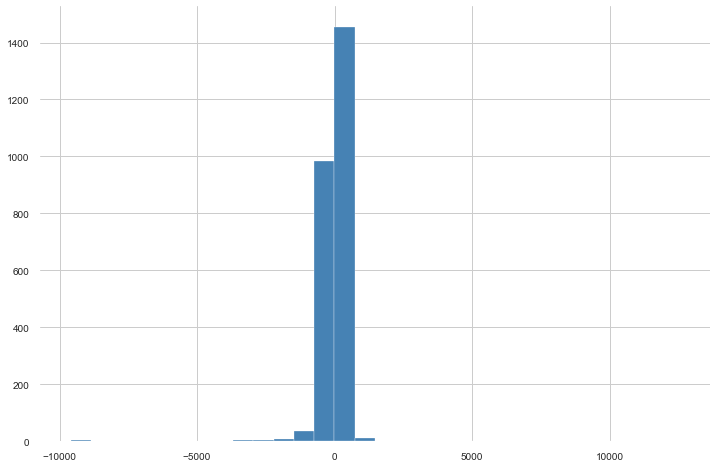

In [38]:
# Analysing unit_price equal 0
plt.figure(figsize=(12,8))
df[df['unit_price'] == 0]['quantity'].hist(bins=30, color='steelblue')

In [39]:
# Descriptions of "free items" with positive quantity
df[(df['quantity'] > 0) & (df['unit_price'] == 0)]['lowercase_description'].value_counts()

check                                 39
found                                 34
amazon                                18
adjustment                            16
french blue metal door sign 1          9
                                      ..
set of 9 black skull balloons          1
wrongly coded 23343                    1
lunch bag suki design                  1
vintage heads and tails card game      1
christmas pudding trinket pot          1
Name: lowercase_description, Length: 241, dtype: int64

In [40]:
# Descriptions of "free items" with negative quantity
df[(df['quantity'] < 0) & (df['unit_price'] == 0)]['lowercase_description'].value_counts()

check                         123
damaged                        57
damages                        46
?                              41
sold as set on dotcom          20
                             ... 
broken                          1
mouldy, unsaleable.             1
wrong barcode                   1
damages/credits from asos.      1
sold as 22467                   1
Name: lowercase_description, Length: 127, dtype: int64

<br/>
<br/>
<br/>
There are positive and negative quantity values for invoices with unit_price equal to 0. Some of them are damaged or from display as we can see. Perhaps some are free items for promotions or events.
<br/>
<br/>

Now that we know our data set better, let's do some visualization and answer some questions.
<br/>
<br/>
<br/>

### <a id='2.1'>2.1) How many orders for each country?</a>

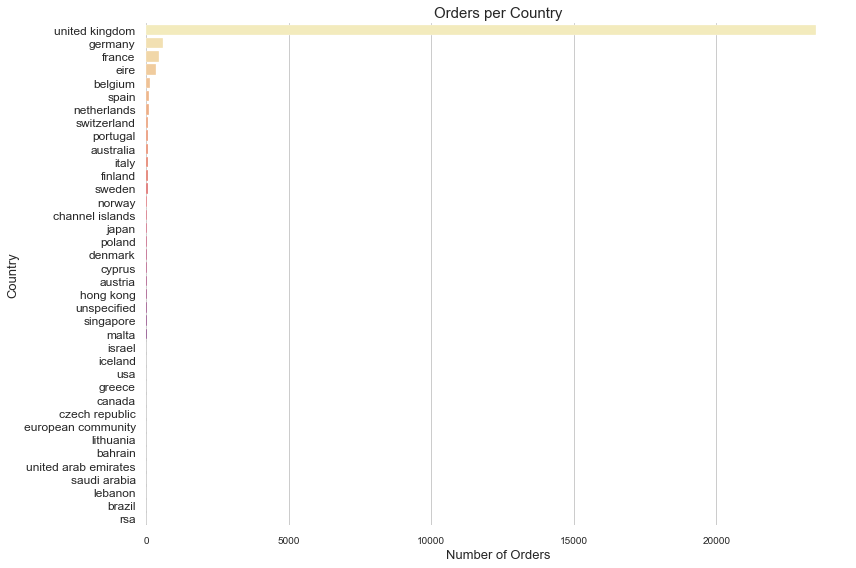

In [41]:
plt.figure(figsize=(12,8))

ax = df.groupby('invoice_num')['lowercase_country'].unique().value_counts()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax, y=ax.index, palette='magma_r', orient='h')

plt.title('Orders per Country', fontsize=15)
plt.xlabel('Number of Orders', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.yticks(fontsize=12)
plt.tight_layout()

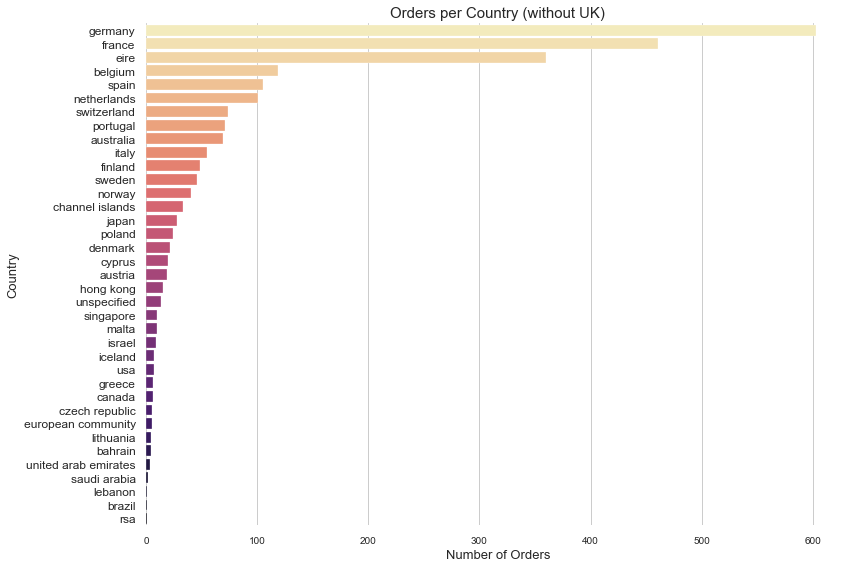

In [42]:
plt.figure(figsize=(12,8))

# UK stands out too much on the chart
ax = df.groupby('invoice_num')['lowercase_country'].unique().value_counts().iloc[1:]

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax, y=ax.index, palette='magma_r', orient='h')

plt.title('Orders per Country (without UK)', fontsize=15)
plt.xlabel('Number of Orders', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.yticks(fontsize=12)
plt.tight_layout()

<br/>
<br/>
<br/>

### <a id='2.2'>2.2) How much money did each country spent?</a>

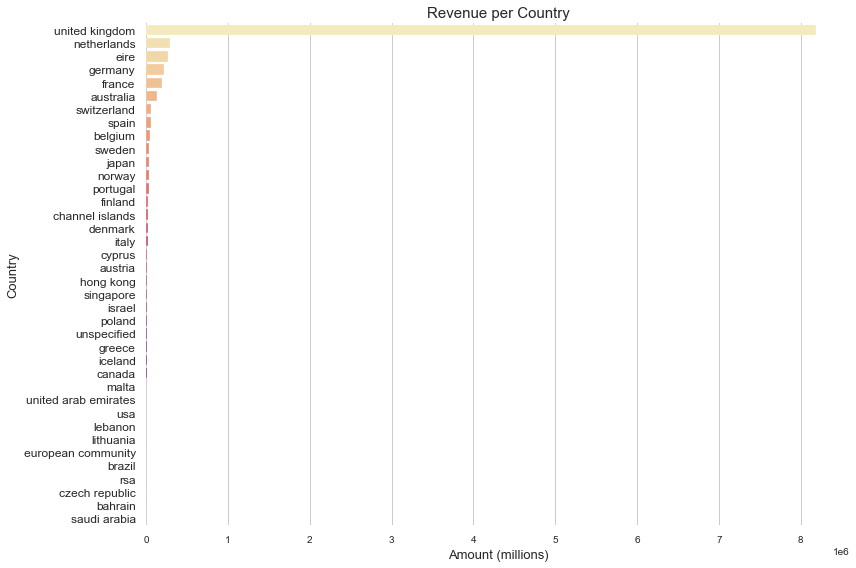

In [43]:
plt.figure(figsize=(12,8))

ax = df.groupby('lowercase_country').sum()['amount_spent'].sort_values(ascending=False)

sns.barplot(x=ax, y=ax.index, palette='magma_r', orient='h')

plt.title('Revenue per Country', fontsize=15)
plt.xlabel('Amount (millions)', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.yticks(fontsize=12)
plt.tight_layout()

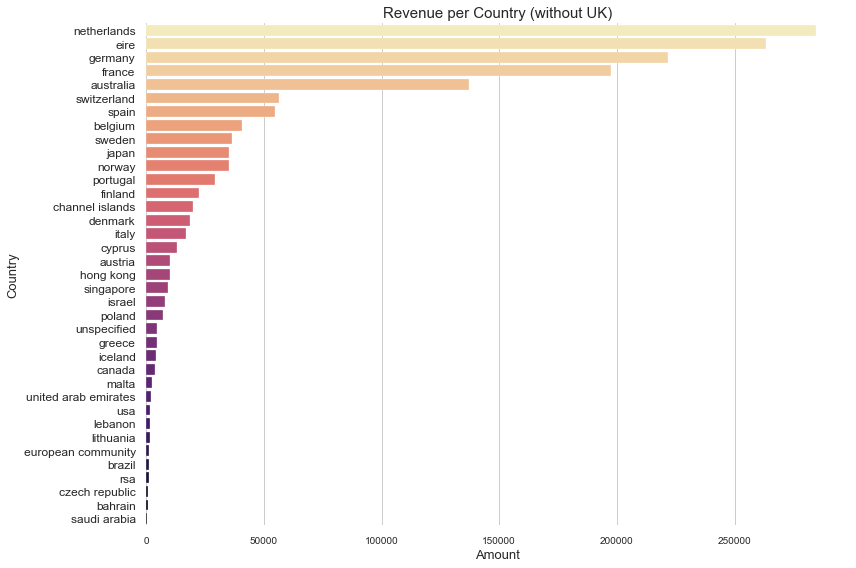

In [44]:
plt.figure(figsize=(12,8))

# UK stands out too much on the chart
ax = df.groupby('lowercase_country').sum()['amount_spent'].sort_values(ascending=False).iloc[1:]

sns.barplot(x=ax, y=ax.index, palette='magma_r', orient='h')

plt.title('Revenue per Country (without UK)', fontsize=15)
plt.xlabel('Amount', fontsize=13)
plt.ylabel('Country', fontsize=13)

plt.yticks(fontsize=12)
plt.tight_layout()

<br/><br/><br/>
This simple analysis shows that we have two important points of view:
- Look at the big picture
- Explore UK sales and separate outside
<br/><br/>

### <a id='2.3'>2.3) How were sales over the months?</a>

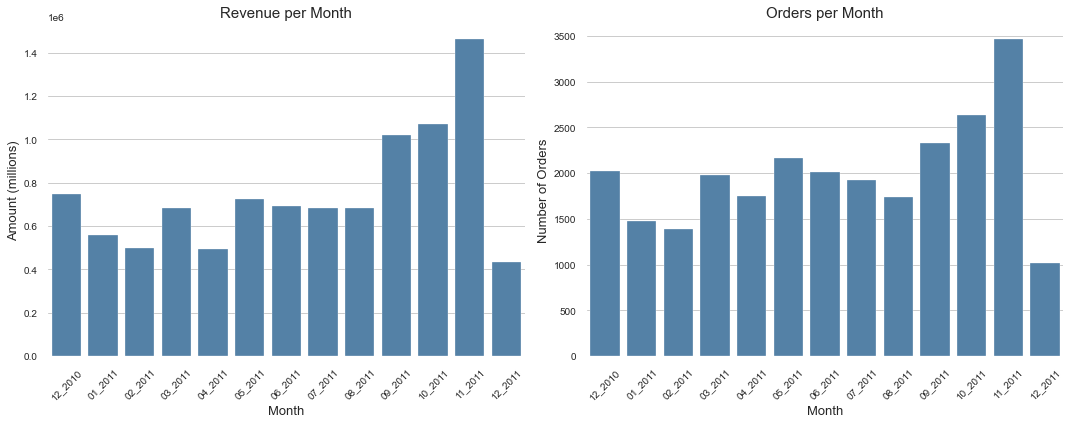

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Revenue per Month
ax = df.groupby('year_month').sum()['amount_spent']

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[0])

axes[0].set_title('Revenue per Month', fontsize=15)
axes[0].set_xlabel('Month', fontsize=13)
axes[0].set_ylabel('Amount (millions)', fontsize=13)

label = df['year_month'].apply(lambda date: date[4:] + '_' + date[:4]).unique()

axes[0].set_xticklabels(label, rotation=45)

# Orders x Month
ax = df.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue', ax=axes[1])

axes[1].set_title('Orders per Month', fontsize=15)
axes[1].set_xlabel('Month', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

axes[1].set_xticklabels(label, rotation=45)

plt.tight_layout()

<br/>
<br/>
<br/>
Remember that sales occurred between 01/12/2010 and 09/12/2011. December 2011 sales go through the 9th.
<br/>
<br/>
Although the behavior of revenue and orders per month tends to be similar, we can see that the average amount spent on each order per month is different. This will be discussed in the Average Ticket section.
<br/>
<br/>
January, February and April sales were the worst, except for December 2011. On the other hand, September, October and November were the best sales, in these months there is a growing demand for Christmas gifts and wholesalers are preparing for Black Friday (last Friday in November).
<br/>
<br/>

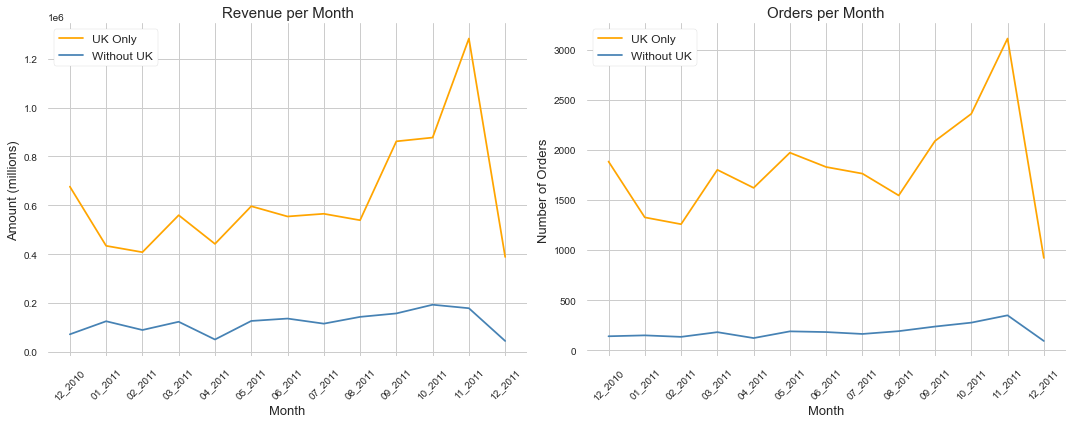

In [46]:
# Comparing UK sales to sales outside UK
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Revenue per Month (Only UK)
ax = df[
        df['lowercase_country'] == 'united kingdom'
       ].groupby('year_month').sum()['amount_spent']

sns.lineplot(x=ax.index, y=ax, color='orange', ax=axes[0])

# Revenue per Month (Without UK)
ax = df[
        df['lowercase_country'] != 'united kingdom'
       ].groupby('year_month').sum()['amount_spent']

sns.lineplot(x=ax.index, y=ax, color='steelblue', ax=axes[0])

axes[0].set_title('Revenue per Month', fontsize=15)
axes[0].set_xlabel('Month', fontsize=13)
axes[0].set_ylabel('Amount (millions)', fontsize=13)

label = df['year_month'].apply(lambda date: date[4:] + '_' + date[:4]).unique()

axes[0].set_xticklabels(label, rotation=45)

axes[0].legend(['UK Only', 'Without UK'], fontsize=12, framealpha=1)

# Orders x Month (Only UK)
ax = df[
        df['lowercase_country'] == 'united kingdom'
       ].groupby('invoice_num')['year_month'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.lineplot(x=ax.index, y=ax, color='orange', ax=axes[1])

# Orders x Month (Without UK)
ax = df[
        df['lowercase_country'] != 'united kingdom'
       ].groupby('invoice_num')['year_month'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.lineplot(x=ax.index, y=ax, color='steelblue', ax=axes[1])

axes[1].set_title('Orders per Month', fontsize=15)
axes[1].set_xlabel('Month', fontsize=13)
axes[1].set_ylabel('Number of Orders', fontsize=13)

axes[1].set_xticklabels(label, rotation=45)

axes[1].legend(['UK Only', 'Without UK'], fontsize=12, framealpha=1)

plt.tight_layout()

<br/>
<br/>
<br/>
Sales outside UK appear to be more stable. Although the "Without UK" curve is much lower than the "UK Only", it looks smoothier over the months. Christmas demand is more pronounced for sales in the UK than for sales outside the UK.
<br/>
<br/>

### <a id='A.T'>Average Ticket</a>

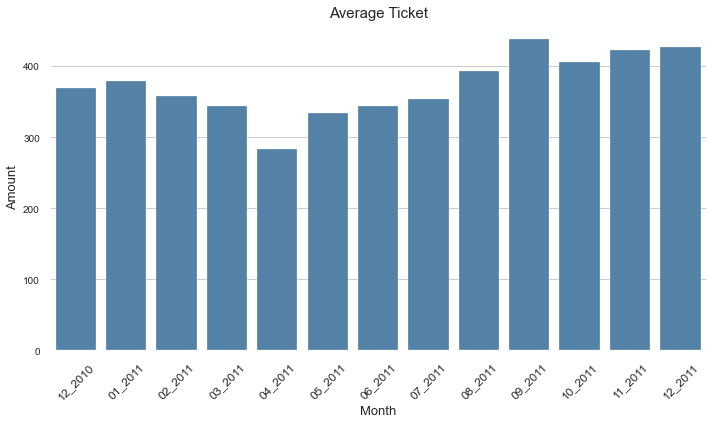

In [47]:
plt.figure(figsize=(10,6))

ax1 = df.groupby('year_month')['amount_spent'].sum()
ax2 = df.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()

# Removing the index brackets
ax2.index = [index[0] for index in ax2.index]
ax = ax1 / ax2

sns.barplot(x=ax.index, y=ax, color='steelblue')

plt.title('Average Ticket', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Amount', fontsize=13)

label = df['year_month'].apply(lambda date: date[4:] + '_' + date[:4]).unique()

plt.xticks(ticks=range(len(label)), labels=label, rotation=45, fontsize=12)
plt.tight_layout()

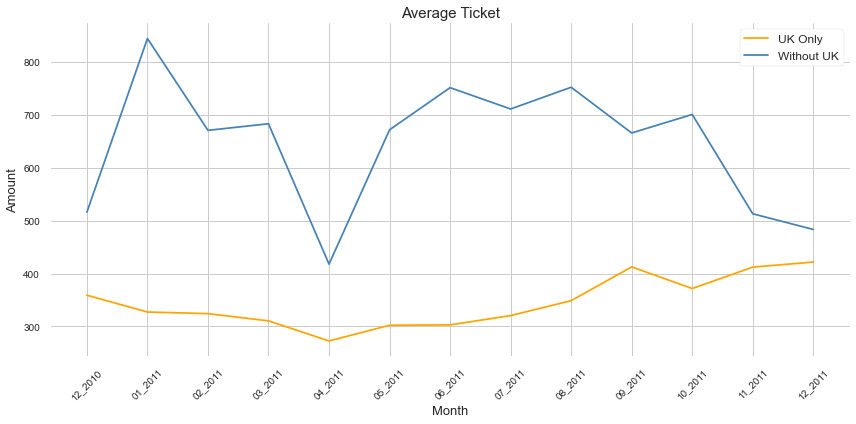

In [48]:
# Comparing UK Average Ticket to Average Ticket outside UK
fig, axes = plt.subplots(figsize=(12, 6))

# Average Ticker (Only UK)
ax1 = df[
         df['lowercase_country'] == 'united kingdom'
        ].groupby('year_month')['amount_spent'].sum()

ax2 = df[
         df['lowercase_country'] == 'united kingdom'
        ].groupby('invoice_num')['year_month'].unique().value_counts().sort_index()

# Removing the index brackets
ax2.index = [index[0] for index in ax2.index]
ax = ax1 / ax2

sns.lineplot(x=ax.index, y=ax, color='orange', ax=axes)

label = df['year_month'].apply(lambda date: date[4:] + '_' + date[:4]).unique()

# Average Ticker (Without UK)
ax1 = df[
         df['lowercase_country'] != 'united kingdom'
        ].groupby('year_month')['amount_spent'].sum()

ax2 = df[
         df['lowercase_country'] != 'united kingdom'
        ].groupby('invoice_num')['year_month'].unique().value_counts().sort_index()

# Removing the index brackets
ax2.index = [index[0] for index in ax2.index]
ax = ax1 / ax2

sns.lineplot(x=ax.index, y=ax, color='steelblue', ax=axes)

axes.set_title('Average Ticket', fontsize=15)
axes.set_xlabel('Month', fontsize=13)
axes.set_ylabel('Amount', fontsize=13)

axes.set_xticklabels(label, rotation=45)

axes.legend(['UK Only', 'Without UK'], fontsize=12, framealpha=1)

plt.tight_layout()

<br/><br/><br/>
Althongh revenue and number of orders in the UK are higher than abroad, the opposite is true for the average ticket. This indicates that the amount spent on orders outside the UK are higher.
<br/><br/>
Looking at all the sales over the months, we can see a significant drop in April.
<br/><br/>
There are some key dates that move retail and April is just between them:
<br/>

+ Frebruary: Valentine's Day<br/>

+ May: Mother's Day<br/>

+ June: Father's Day<br/>

+ August/September: Back-to-school (most countries are in the northern hemisphere)<br/>

+ October: Halloween<br/>

+ November: Black Friday<br/>

+ December: Christmas
<br/><br/>

### <a id='2.4'>2.4) How orders were distributed by day (of month)</a>

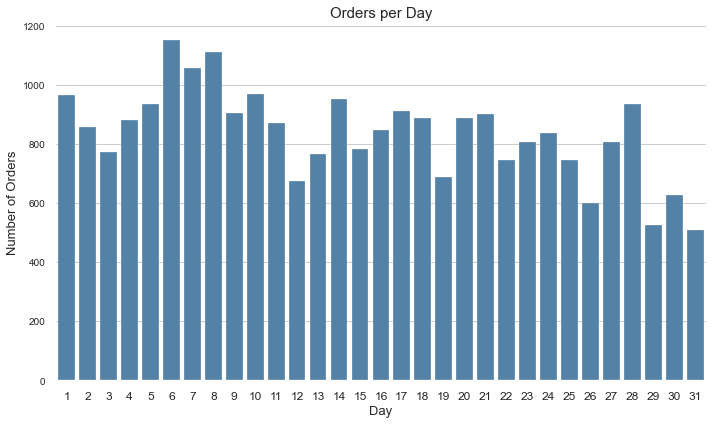

In [49]:
plt.figure(figsize=(10,6))

ax = df.groupby('invoice_num')['month_day'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue')

plt.title('Orders per Day', fontsize=15)
plt.xlabel('Day', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

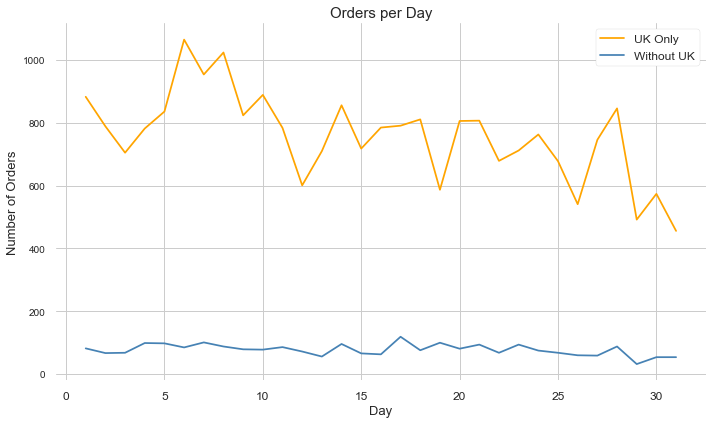

In [50]:
# Comparing UK orders to orders outside UK per day
fig, axes = plt.subplots(figsize=(10, 6))

# Order per day (UK only)
ax = df[
        df['lowercase_country'] == 'united kingdom'
       ].groupby('invoice_num')['month_day'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.lineplot(x=ax.index, y=ax, color='orange', ax=axes)

# Order per day (without UK)
ax = df[
        df['lowercase_country'] != 'united kingdom'
       ].groupby('invoice_num')['month_day'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.lineplot(x=ax.index, y=ax, color='steelblue', ax=axes)

axes.set_title('Orders per Day', fontsize=15)
axes.set_xlabel('Day', fontsize=13)
axes.set_ylabel('Number of Orders', fontsize=13)

axes.tick_params(axis="x", labelsize=12)

axes.legend(['UK Only', 'Without UK'], fontsize=12, framealpha=1)

plt.tight_layout()

<br/><br/><br/>
There is a substancial demand between the 5th and 10th, but it is not enough to say the trend with certainty.
<br/><br/>
For this analysis, I will use the Polynomial Regression approach, taking the number of orders per day as a series. The goal is to plot just a trend line.
<br/><br/>

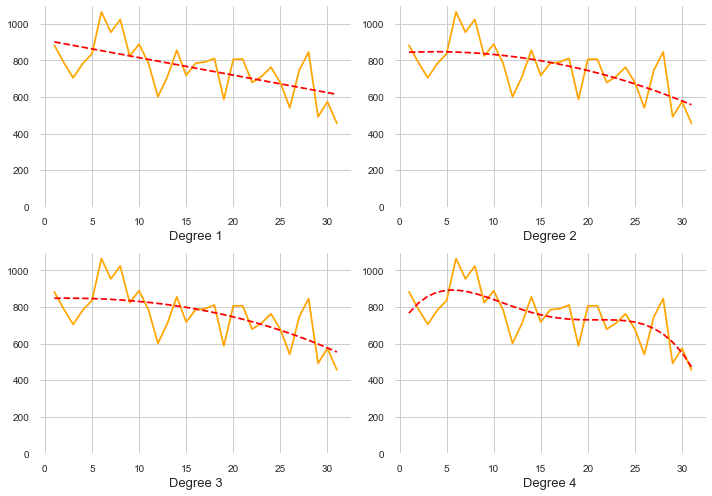

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

for i in range(4):
    
    # Where each subplot will be
    if i < 2:
        plot = (0,i)
    else:
        plot = (1,(i-2))

    # Order per day (UK only)
    y = df[
           df['lowercase_country'] == 'united kingdom'
          ].groupby('invoice_num')['month_day'].unique().value_counts().sort_index()
    
    # Removing the index brackets
    x = [index[0] for index in y.index]
    
    sns.lineplot(x=x, y=y, color='orange', ax=axes[plot])
    
    # transforming the data to include another axis
    x = np.array(x)
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
    
    polynomial_features= PolynomialFeatures(degree=(i+1))
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    axes[plot].plot(x, y_poly_pred, 'r--')
    
    axes[plot].set_xlabel('Degree ' + str(i+1), fontsize=13)
    axes[plot].set_ylabel('')
    
    axes[plot].set_ylim(ymin=0)

plt.tight_layout()

<br/><br/><br/>
The dashed red line shows the trend. The second and third-degree are almost the same. I will use the third-degree. Higher degrees will just overfit it.
<br/><br/>

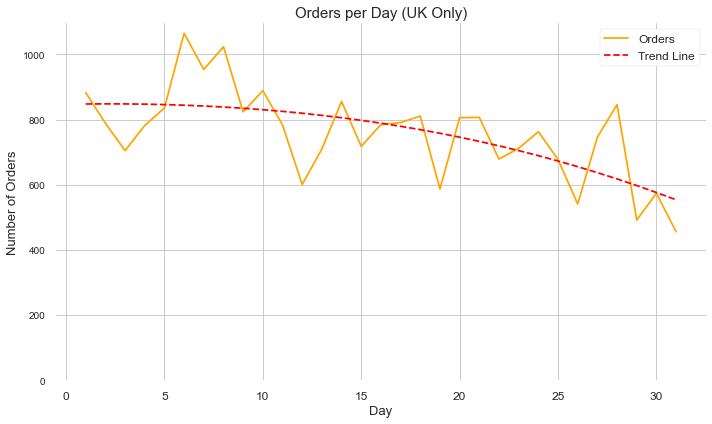

In [52]:
fig, axes = plt.subplots(figsize=(10, 6))

# Order per day (UK only)
y = df[
       df['lowercase_country'] == 'united kingdom'
      ].groupby('invoice_num')['month_day'].unique().value_counts().sort_index()

# Removing the index brackets
x = [index[0] for index in y.index]

sns.lineplot(x=x, y=y, color='orange', ax=axes)

# transforming the data to include another axis
x = np.array(x)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

axes.plot(x, y_poly_pred, 'r--')

axes.set_title('Orders per Day (UK Only)', fontsize=15)
axes.set_xlabel('Day', fontsize=13)
axes.set_ylabel('Number of Orders', fontsize=13)

axes.tick_params(axis="x", labelsize=12)

axes.legend(['Orders', 'Trend Line'], fontsize=12, framealpha=1)

plt.ylim(ymin=0)

plt.tight_layout()

<br/><br/><br/>
In the UK, the number of orders starts high at the begining of the month and falls over the days.
<br/><br/>

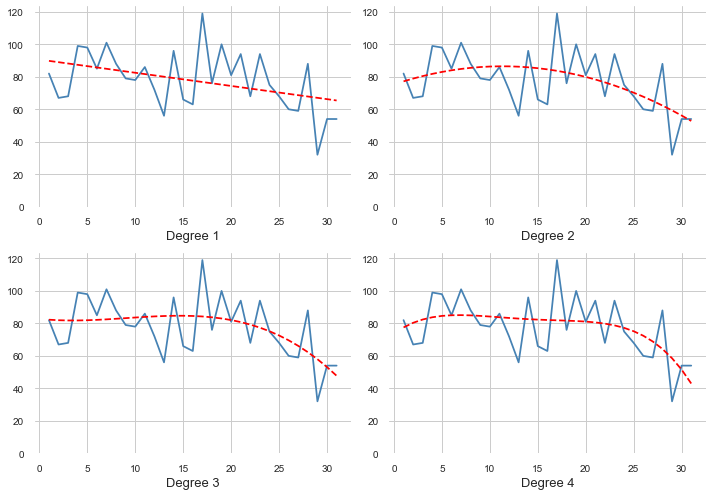

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

for i in range(4):
    
    # Where each subplot will be
    if i < 2:
        plot = (0,i)
    else:
        plot = (1,(i-2))

    # Order per day (UK only)
    y = df[
           df['lowercase_country'] != 'united kingdom'
          ].groupby('invoice_num')['month_day'].unique().value_counts().sort_index()
    
    # Removing the index brackets
    x = [index[0] for index in y.index]
    
    sns.lineplot(x=x, y=y, color='steelblue', ax=axes[plot])
    
    # transforming the data to include another axis
    x = np.array(x)
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
    
    polynomial_features= PolynomialFeatures(degree=(i+1))
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    axes[plot].plot(x, y_poly_pred, 'r--')
    
    axes[plot].set_xlabel('Degree ' + str(i+1), fontsize=13)
    axes[plot].set_ylabel('')
    
    axes[plot].set_ylim(ymin=0)

plt.tight_layout()

<br/><br/><br/>
Third-degree fits better the number of orders per day.
<br/><br/>

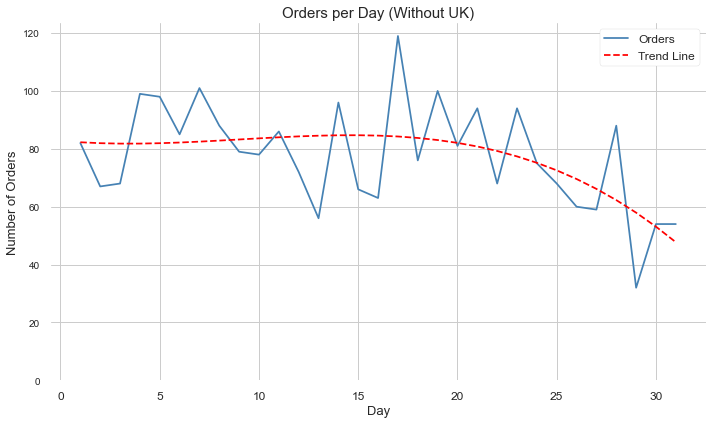

In [54]:
fig, axes = plt.subplots(figsize=(10, 6))

# Order per day (without UK)
y = df[
       df['lowercase_country'] != 'united kingdom'
      ].groupby('invoice_num')['month_day'].unique().value_counts().sort_index()

# Removing the index brackets
x = [index[0] for index in y.index]

sns.lineplot(x=x, y=y, color='steelblue', ax=axes)

# transforming the data to include another axis
x = np.array(x)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

axes.plot(x, y_poly_pred, 'r--')

axes.set_title('Orders per Day (Without UK)', fontsize=15)
axes.set_xlabel('Day', fontsize=13)
axes.set_ylabel('Number of Orders', fontsize=13)

axes.tick_params(axis="x", labelsize=12)

axes.legend(['Orders', 'Trend Line'], fontsize=12, framealpha=1)

plt.ylim(ymin=0)

plt.tight_layout()

<br/><br/><br/>
Outside the UK, we can see that the number of orders remains stable until the 20th and then starts to fall.
<br/><br/>
Although a third-degree polynomial cannot fully express the sales forecast, it did a good job helping us understand the chaotic behavior of orders per day.
<br/><br/>

### <a id='2.5'>2.5) How orders were distributed by day (of week):</a>

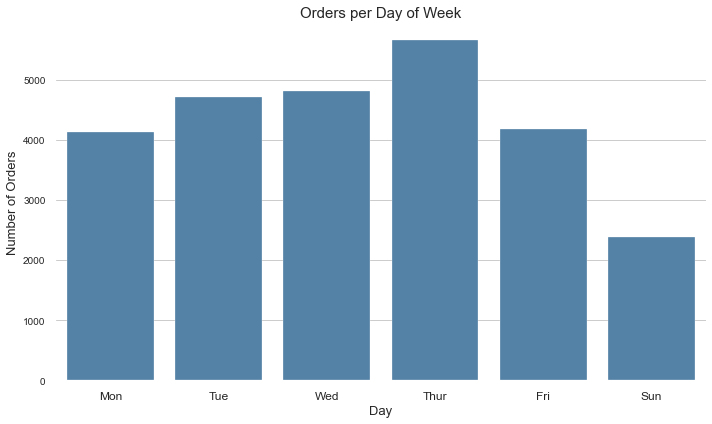

In [55]:
plt.figure(figsize=(10,6))

ax = df.groupby('invoice_num')['week_day'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue')

plt.title('Orders per Day of Week', fontsize=15)
plt.xlabel('Day', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)

# WeekDay goes from 0-Monday to 6-Sunday
label = ['Mon','Tue','Wed','Thur','Fri','Sun']
tick = range(len(label))

plt.xticks(ticks=tick, labels=label, fontsize=12)
plt.tight_layout()

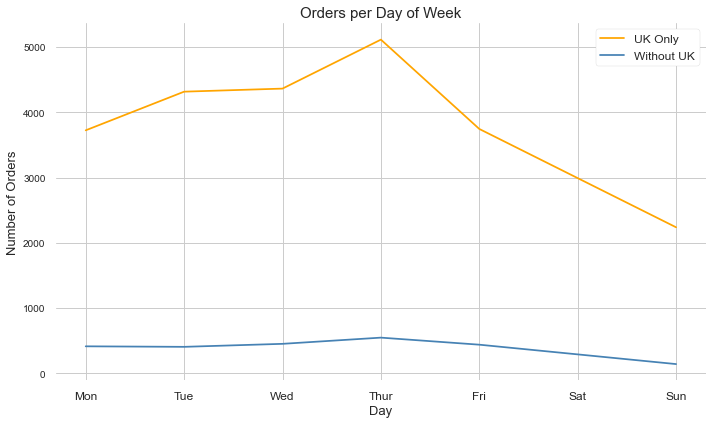

In [56]:
# Comparing UK orders to orders outside UK per day of week
fig, axes = plt.subplots(figsize=(10, 6))

# Order per day of week (UK only)
ax = df[
        df['lowercase_country'] == 'united kingdom'
       ].groupby('invoice_num')['week_day'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.lineplot(x=ax.index, y=ax, color='orange', ax=axes)

# Order per day of week (without UK)
ax = df[
        df['lowercase_country'] != 'united kingdom'
       ].groupby('invoice_num')['week_day'].unique().value_counts().sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.lineplot(x=ax.index, y=ax, color='steelblue', ax=axes)

axes.set_title('Orders per Day of Week', fontsize=15)
axes.set_xlabel('Day', fontsize=13)
axes.set_ylabel('Number of Orders', fontsize=13)

label = ['','Mon','Tue','Wed','Thur','Fri', 'Sat', 'Sun']

axes.set_xticklabels(label, fontsize=12)

axes.legend(['UK Only', 'Without UK'], fontsize=12, framealpha=1)

plt.tight_layout()

<br/><br/><br/>
The peak in the number of orders is on Thursday. Although Saturday appears on the chart, there are no recorded sales, it is just the trend line between Friday and Sunday.
<br/><br/>

### <a id='2.6'>2.6) How orders were distributed by hour?</a>

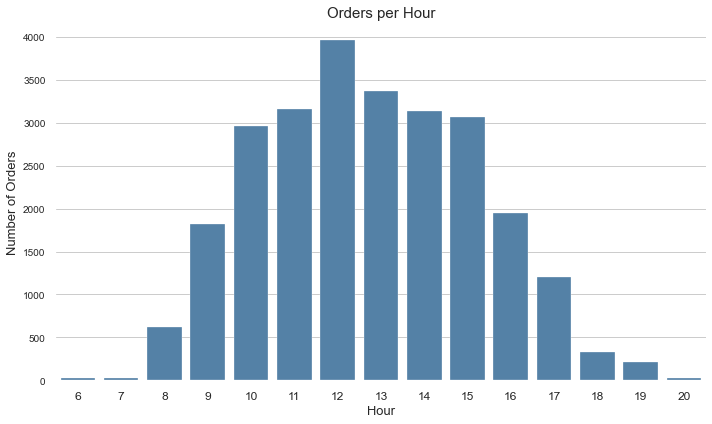

In [57]:
plt.figure(figsize=(10,6))

ax = df.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.barplot(x=ax.index, y=ax, color='steelblue')

plt.title('Orders per Hour', fontsize=15)
plt.xlabel('Hour', fontsize=13)
plt.ylabel('Number of Orders', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

<br/>
<br/>
<br/>
Sales are concetrated around noon. Indicates that there is a preference to buy at lunch.
<br/>
<br/>
<br/>

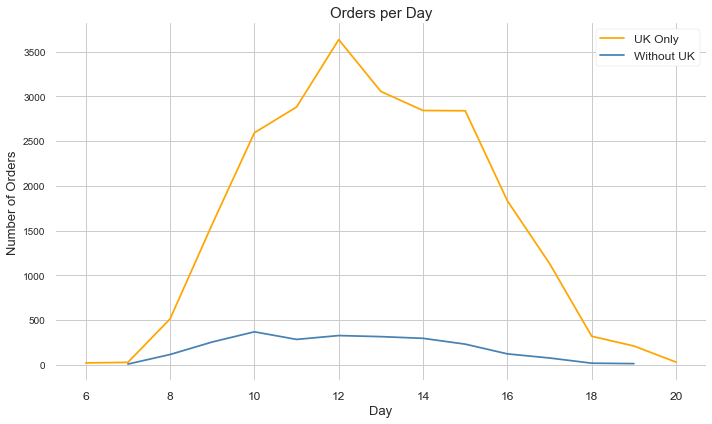

In [58]:
# Comparing UK orders to orders outside UK per hour
fig, axes = plt.subplots(figsize=(10, 6))

# Order per hour (UK only)
ax = df[
        df['lowercase_country'] == 'united kingdom'
       ].groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.lineplot(x=ax.index, y=ax, color='orange', ax=axes)

# Order per hour (without UK)
ax = df[
        df['lowercase_country'] != 'united kingdom'
       ].groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

# Removing the index brackets
ax.index = [index[0] for index in ax.index]

sns.lineplot(x=ax.index, y=ax, color='steelblue', ax=axes)

axes.set_title('Orders per Day', fontsize=15)
axes.set_xlabel('Day', fontsize=13)
axes.set_ylabel('Number of Orders', fontsize=13)

axes.tick_params(axis="x", labelsize=12)

axes.legend(['UK Only', 'Without UK'], fontsize=12, framealpha=1)

plt.tight_layout()

<br/><br/><br/>
Sales in the UK take place between 6 am and 8 pm, while external sales take place between 7 am and 7 pm.
<br/><br/>

### <a id='2.7'>2.7)  What are the most common stock codes?</a>

<br/>
<br/>
These are the top 20 stock codes and how much do they represent in revenue (percentage).
<br/>
<br/>

In [59]:
common_codes = []

for code in df['stock_code'].value_counts()[:20].index:
    
    common_codes.append((code,
                         products[
                                  (products[~products.isna()]['stock_code'] == code)
                                 ]['lowercase_description'].iloc[0],
                         df[df['stock_code'] == code]['amount_spent'].sum(),
                         df[df['stock_code'] == code]['amount_spent'].sum() / df['amount_spent'].sum() * 100))
    

pd.DataFrame(common_codes, columns=['stock_code', 'description', 'amount', 'percertage'])

,stock_code,description,amount,percertage
0,85123A,white hanging heart t-light holder,97894.50,1.004278
1,22423,regency cakestand 3 tier,164762.19,1.690259
2,85099B,jumbo bag red retrospot,92356.03,0.947460
3,47566,party bunting,98302.98,1.008469
4,20725,lunch bag red retrospot,35187.31,0.360979
5,84879,assorted colour bird ornament,58959.73,0.604855
6,22720,set of 3 cake tins pantry design,37413.44,0.383816
7,22197,small popcorn holder,50987.47,0.523069
8,21212,pack of 72 retrospot cake cases,21059.72,0.216047
9,20727,lunch bag black skull.,22219.01,0.227940


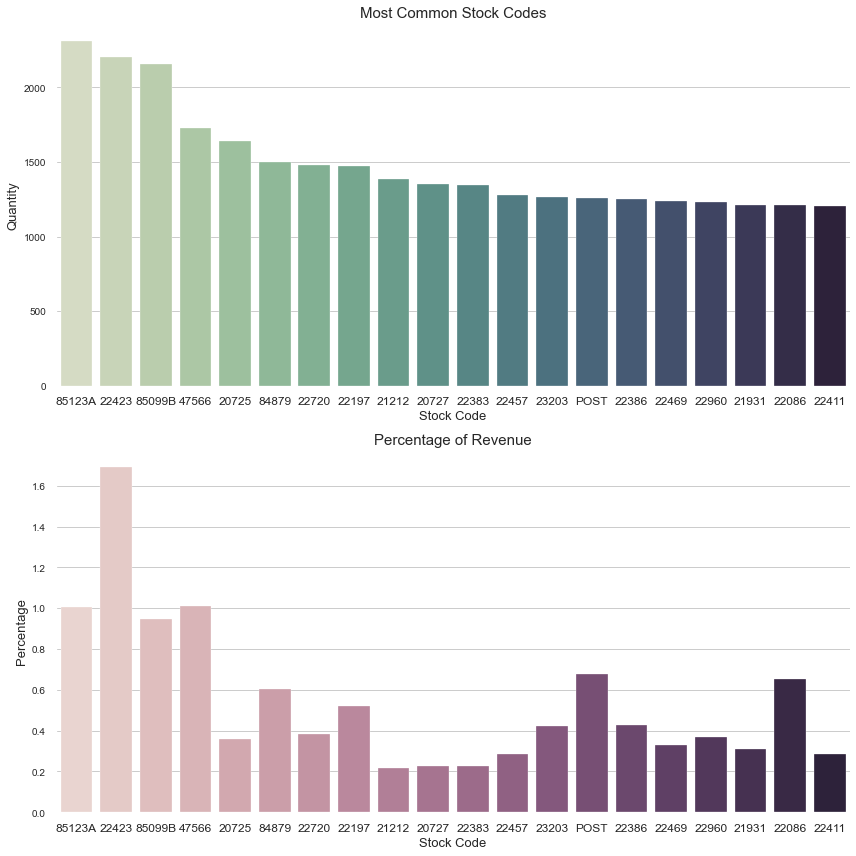

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# The 20 most common stock codes
ax = df['stock_code'].value_counts()[:20]

sns.barplot(x=ax.index, y=ax, 
            palette=sns.cubehelix_palette(20, start=.5, rot=-.75),
            ax=axes[0])

axes[0].set_title('Most Common Stock Codes', fontsize=15)
axes[0].set_xlabel('Stock Code', fontsize=13)
axes[0].set_ylabel('Quantity', fontsize=13)

axes[0].tick_params(axis="x", labelsize=12)

# Percentage of revenue (20 most common stock codes)
common_codes = []

for code in df['stock_code'].value_counts()[:20].index:
    
    common_codes.append((code,
                         df[df['stock_code'] == code]['amount_spent'].sum() / df['amount_spent'].sum() * 100))
    

ax = pd.DataFrame(common_codes, columns=['stock_code', 'percertage'])

sns.barplot(x='stock_code', y='percertage', data=ax,
            palette=sns.cubehelix_palette(20),
            ax=axes[1])

axes[1].set_title('Percentage of Revenue', fontsize=15)
axes[1].set_xlabel('Stock Code', fontsize=13)
axes[1].set_ylabel('Percentage', fontsize=13)

axes[1].tick_params(axis="x", labelsize=12)

plt.tight_layout()

<br/><br/><br/>

Being the most frequent does not mean necessarily represent a large part of the revenue. The product **85123A - "white hanging heart t-light holder"** is the best seller and representes practically **1.0%** of the revenue while the product **22423 - "regency cakestand 3 tier"** is the second place and represents more than **1.6%** of the revenue.

<br/><br/>

### <a id='2.8'>2.8)  Which stock codes contribute the most to revenue?</a>

<br/>

The top 20 stock codes that contribute the most to revenue:

<br/>

In [69]:
top_revenue = []

for code in df.groupby(
                       'stock_code'
                      )[
                        'amount_spent'
                       ].sum().sort_values(ascending=False)[:20].index:
    
    top_revenue.append((code,
                        products[
                                 (products[~products.isna()]['stock_code'] == code)
                                ]['lowercase_description'].iloc[0],
                        df[df['stock_code'] == code]['amount_spent'].sum(),
                        df[df['stock_code'] == code]['amount_spent'].sum() / df['amount_spent'].sum() * 100))
    

pd.DataFrame(top_revenue, columns=['stock_code', 'description', 'amount', 'percertage'])

,stock_code,description,amount,percertage
0,DOT,dotcom postage,206245.48,2.115827
1,22423,regency cakestand 3 tier,164762.19,1.690259
2,47566,party bunting,98302.98,1.008469
3,85123A,white hanging heart t-light holder,97894.50,1.004278
4,85099B,jumbo bag red retrospot,92356.03,0.947460
5,23084,rabbit night light,66756.59,0.684841
6,POST,postage,66230.64,0.679446
7,22086,paper chain kit 50's christmas,63791.94,0.654427
8,84879,assorted colour bird ornament,58959.73,0.604855
9,79321,chilli lights,53768.06,0.551595


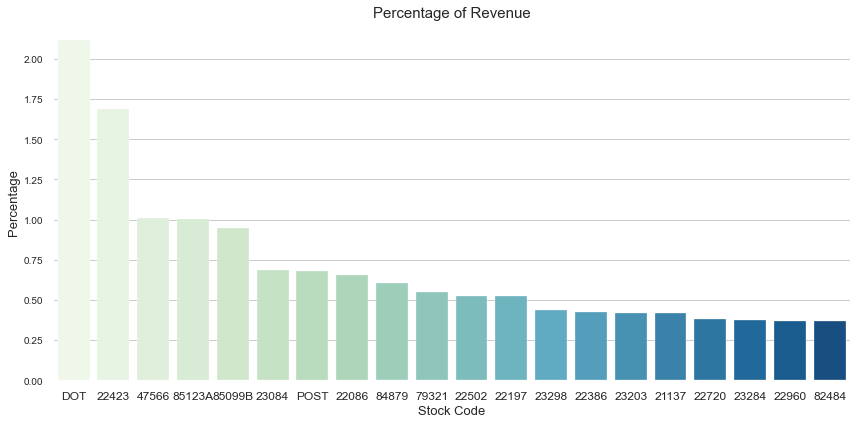

In [86]:
plt.figure(figsize=(12,6))

# top 20 stock codes in revenue
ax = df.groupby(
                'stock_code'
               )[
                 'amount_spent'
                ].sum().sort_values(ascending=False)[:20] / df['amount_spent'].sum() * 100

sns.barplot(x=ax.index, y=ax, palette='GnBu')

plt.title('Percentage of Revenue', fontsize=15)
plt.xlabel('Stock Code', fontsize=13)
plt.ylabel('Percentage', fontsize=13)

plt.xticks(fontsize=12)
plt.tight_layout()

<br/><br/><br/>

**DOT** means **"dotcom postage"**, that is, it is not a product but a service. The real top product is the stock code **22423 -	"regency cakestand 3 tier"** and stands out compared to others.

<br/><br/>